In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1. Описание данных

In [ ]:
df = pd.read_csv("GSOEP9402.csv")
df.head(5)

,Unnamed: 0,school,birthyear,gender,kids,parity,income,size,state,marital,meducation,memployment,year
0,1,Gymnasium,1981,female,2,2,35160.113491,4,Berlin,married,14.5,none,1995
1,2,Gymnasium,1981,female,2,2,65748.345269,3,Berlin,married,10.5,parttime,1995
2,3,Gymnasium,1980,female,3,3,120962.356461,3,Berlin,married,12.0,parttime,1994
3,4,Gymnasium,1984,female,1,1,60100.572300,3,Berlin,married,10.5,parttime,1998
4,5,Realschule,1982,male,4,4,34828.951843,4,Berlin,divorced,10.0,fulltime,1996


school - школа (тип, строка)

birthyear - год рождения (целое число)

gender - пол (бинарный)

kids - число детей (целое число)

parity - порядок рождения (целое число)

income - доход домохозяйства (вещественное число)

size - размер домохозяйства (целое число)

state - фактор, указывающий на федеральную землю Германии (строка)

marital - фактор, указывающий на семейное положение матери (бинарный)

meducation - уровень образования матери в годах (вещественный)

memployment - фактор, указывающий на уровень занятости матери: полный рабочий день, неполный рабочий день или не работает (строка)

year - год волны ГСОЭП

Параметры для анализа - income, birthyear, kids

# Задание 2: Создайте круговую диаграмму

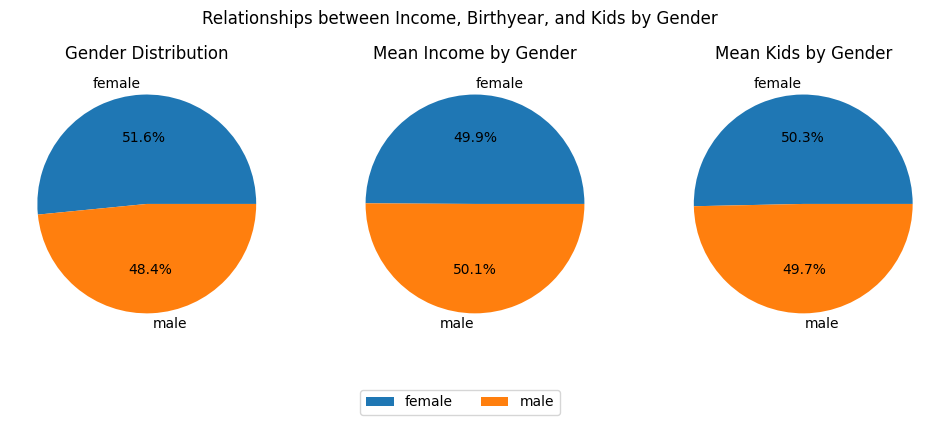

In [ ]:
gender_counts = df['gender'].value_counts()
income_mean = df.groupby('gender')['income'].mean()
birthyear_mean = df.groupby('gender')['birthyear'].mean()
kids_mean = df.groupby('gender')['kids'].mean()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axes[0].set_title('Gender Distribution')

axes[1].pie(income_mean, labels=income_mean.index, autopct='%1.1f%%')
axes[1].set_title('Mean Income by Gender')

axes[2].pie(kids_mean, labels=kids_mean.index, autopct='%1.1f%%')
axes[2].set_title('Mean Kids by Gender')

fig.suptitle('Relationships between Income, Birthyear, and Kids by Gender')
fig.legend(gender_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.show()

На основе круговой диаграммы и предоставленного набора данных можно сделать следующие выводы по заданию 2:

1. Гендерное распределение: Круговая диаграмма показывает распределение полов в наборе данных. Она показывает, что в наборе данных преобладают женщины, составляющие 52% данных, в то время как мужчины составляют оставшиеся 48%.

2. Средний доход по полу: Вторая круговая диаграмма отображает средний доход для каждого пола. Это говорит о том, что существует небольшая разница в доходах между полами. 

3. Среднее количество детей по полу: Третья круговая диаграмма иллюстрирует среднее количество детей для каждого пола. Из нее следует, что в среднем женщины имеют немного больше детей по сравнению с мужчинами. Однако, как и в случае с анализом доходов.



# Задача 3: Группировка данных столбца meducation по годам с помощью GroupBy и pivot table

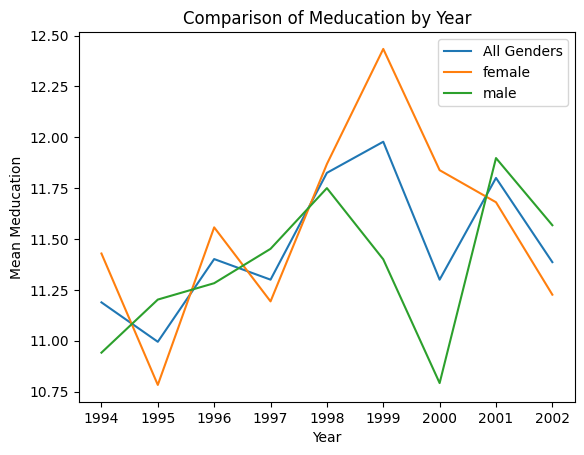

In [ ]:
grouped_by_year = df.groupby('year')['meducation'].mean()
pivot_table = pd.pivot_table(df, values='meducation', index='year', columns='gender', aggfunc='mean')

fig, ax = plt.subplots()
grouped_by_year.plot(ax=ax, label='All Genders')
pivot_table.plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Mean Meducation')
ax.set_title('Comparison of Meducation by Year')
ax.legend()

plt.show()

На основании анализа, проведенного в задании 3, сравнивая данные столбца meducation по годам с помощью GroupBy и таблицы pivot, мы можем сделать следующие выводы:

  Анализ GroupBy: Линейный график, созданный путем группировки данных столбца meducation по годам, показывает тенденцию среднего meducation (предположительно, уровня образования) с течением времени для всех полов вместе взятых. Он дает общее представление о том, как средний уровень образования менялся из года в год. График позволяет наблюдать любые заметные закономерности или тенденции в данных.

  Линейный график, созданный с помощью таблицы pivot, представляет средний уровень образования по годам, с отдельными линиями для каждого пола. Этот график позволяет сравнить средние уровни образования для разных полов с течением времени. Изучая отдельные линии, мы можем выявить любые гендерные тенденции или различия в уровне образования.

# Задание 4: Диаграмма рассеяния, отражающая взаимосвязь между выбранными столбцами

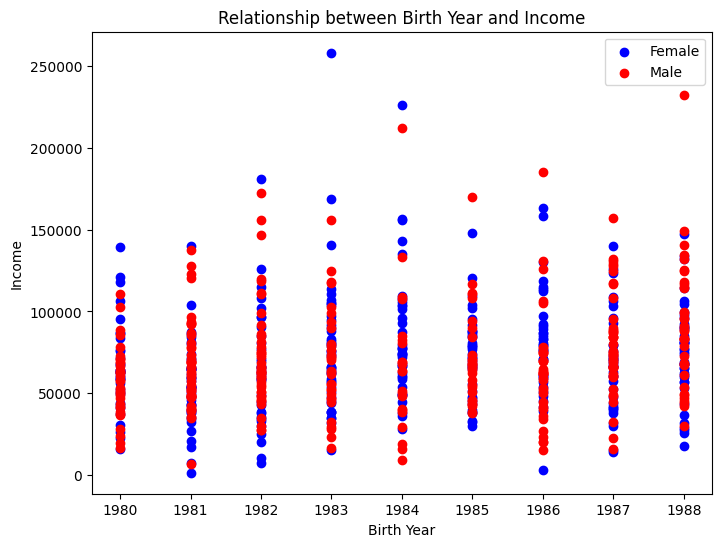

In [ ]:
plt.figure(figsize=(8, 6))

colors = {'female': 'blue', 'male': 'red'}

plt.scatter(
    df[df['gender'] == 'female']['birthyear'],
    df[df['gender'] == 'female']['income'],
    color=colors['female'],
    label='Female'
)

plt.scatter(
    df[df['gender'] == 'male']['birthyear'],
    df[df['gender'] == 'male']['income'],
    color=colors['male'],
    label='Male'
)

plt.xlabel('Birth Year')
plt.ylabel('Income')
plt.title('Relationship between Birth Year and Income')
plt.legend()

plt.show()


На основании диаграммы рассеяния, созданной в задании 4, которая отражает взаимосвязь между годом рождения и доходом, разделенным по полу, мы можем сделать следующие выводы:

   1.Распределение доходов: Диаграмма рассеяния показывает распределение значений дохода по разным годам рождения как для мужчин, так и для женщин. Это позволяет нам представить распределение доходов в рамках каждого пола и проследить любые закономерности или тенденции.

  2.Гендерные различия: Построив точки данных отдельно для мужчин и женщин, мы можем сравнить соотношение доходов и годов рождения между двумя полами. Мы можем наблюдать, есть ли какие-либо заметные различия или сходства в закономерностях.

  3.Нет четкой взаимосвязи: Судя по диаграмме рассеяния, нет четкой линейной зависимости между годом рождения и доходом для обоих полов. Точки данных разбросаны без заметной тенденции или корреляции.

  4.Перекрывающиеся данные: Стоит отметить, что на диаграмме рассеяния наблюдается некоторое перекрытие точек данных у мужчин и женщин. Это указывает на то, что есть случаи, когда люди разного пола имеют одинаковые значения года рождения и дохода.

# Задание 5

1) Гендерное распределение и характеристики:

 В наборе данных преобладают женщины, на них приходится 52% данных, в то время как мужчины составляют оставшиеся 48%.
        Существует небольшая разница в среднем доходе между полами, но для определения ее значимости требуется дальнейший анализ.
        В среднем женщины имеют несколько больше детей по сравнению с мужчинами, хотя для определения значимости этой разницы необходим дополнительный статистический анализ.

  2) Тенденции в области образования:

   Средний уровень образования (meducation) был проанализирован с течением времени с помощью методов GroupBy и pivot table.
     Линейный график, представляющий средний уровень образования по годам для всех полов вместе взятых, показывает общую тенденцию изменения уровня образования во времени.
      Сводная таблица и соответствующий линейный график позволяют сравнить средние уровни образования по годам, сегментированные по полу, выделяя потенциальные гендерные тенденции или различия.

  3) Взаимосвязь года рождения и дохода:

  Диаграмма рассеяния, изображающая взаимосвязь между годом рождения и доходом, с разбивкой по полу, указывает на отсутствие четкой линейной зависимости между этими двумя переменными.
        Точки данных разбросаны без заметной тенденции или корреляции.
        Существует некоторое совпадение в значениях дохода и года рождения между мужчинами и женщинами, что указывает на случаи, когда лица разного пола имеют схожие характеристики.